In [1]:
from keras.models import load_model,Sequential
from keras.layers import Input, Dense, LSTM,Dropout
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix

def signal_to_catagorical(data):
  data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
  data.loc[data['Signal'] == 'buy', 'Signal'] = 0
  data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
  data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
  return data

def add_shift_day(data,day):
  r_list = []
  for i in range(day,len(data)):#Number mean day to shift
    r_list.append(data[i-day : i])
  return np.array(r_list)



In [2]:
datalist = [f for f in glob.glob("Dataset/*.csv")]
print('have stock = ',len(datalist))


have stock =  76


In [3]:
data = pd.read_csv(datalist[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3023 non-null   object 
 1   High            3023 non-null   float64
 2   Low             3023 non-null   float64
 3   Open            3023 non-null   float64
 4   Close           3023 non-null   float64
 5   Volume          3023 non-null   int64  
 6   Adj Close       3023 non-null   float64
 7   Signal          3023 non-null   object 
 8   MACD-1          3023 non-null   float64
 9   SIGNAL LINE1    3023 non-null   float64
 10  MACD-2          3023 non-null   float64
 11  SIGNAL LINE2    3023 non-null   float64
 12  plusDI          3023 non-null   float64
 13  minusDI         3023 non-null   float64
 14  adx             3023 non-null   float64
 15  storsi          3023 non-null   float64
 16  %K              3023 non-null   float64
 17  %D              3023 non-null   f

In [4]:
#validation 
val_list = []
for val_name in range(71,74):
    df = pd.read_csv(datalist[val_name])
    val_x = df
    # val_x = add_shift_day(val_x,30)
    val_list.append(val_x)

#test
test_list = []
for test_name in range(74,76):
    df = pd.read_csv(datalist[test_name])
    test = df
    # test = add_shift_day(test,30)
    test_list.append(test)

In [5]:
model = Sequential()
model.add(LSTM(100, input_shape=((30,7)),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint = ModelCheckpoint('Model/lstm_model_trend3_1.h5',
                               verbose=1,
                               monitor='val_acc',
                               mode='max',
                               save_best_only = True)



Epoch 1/60
92/93 [============================>.] - ETA: 0s - loss: 0.8032 - acc: 0.7031
Epoch 00001: val_acc improved from -inf to 0.57477, saving model to Model\lstm_model_trend3_1.h5
93/93 [==============================] - 16s 175ms/step - loss: 0.8011 - acc: 0.7044 - val_loss: 0.9470 - val_acc: 0.5748
Epoch 2/60
93/93 [==============================] - ETA: 0s - loss: 0.6899 - acc: 0.7135
Epoch 00002: val_acc improved from 0.57477 to 0.57929, saving model to Model\lstm_model_trend3_1.h5
93/93 [==============================] - 9s 97ms/step - loss: 0.6899 - acc: 0.7135 - val_loss: 0.9323 - val_acc: 0.5793
Epoch 3/60
93/93 [==============================] - ETA: 0s - loss: 0.6681 - acc: 0.7216
Epoch 00003: val_acc did not improve from 0.57929
93/93 [==============================] - 9s 99ms/step - loss: 0.6681 - acc: 0.7216 - val_loss: 0.9276 - val_acc: 0.5789
Epoch 4/60
93/93 [==============================] - ETA: 0s - loss: 0.6545 - acc: 0.7172
Epoch 00004: val_acc did not improv

Epoch 32/60
93/93 [==============================] - ETA: 0s - loss: 0.5134 - acc: 0.7948- ETA: 1s - loss: 0.5190  - ETA: 0s - loss: 0.5135 - acc: 0.7945
Epoch 00032: val_acc did not improve from 0.58135
93/93 [==============================] - 9s 96ms/step - loss: 0.5135 - acc: 0.7945 - val_loss: 1.1332 - val_acc: 0.5160
Epoch 33/60
93/93 [==============================] - ETA: 0s - loss: 0.5026 - acc: 0.7972
Epoch 00033: val_acc did not improve from 0.58135
93/93 [==============================] - 9s 95ms/step - loss: 0.5026 - acc: 0.7972 - val_loss: 1.1884 - val_acc: 0.5148
Epoch 34/60
93/93 [==============================] - ETA: 0s - loss: 0.4675 - acc: 0.8144- ETA: 0s - loss: 0.4676 - acc: 0.814
Epoch 00034: val_acc did not improve from 0.58135
93/93 [==============================] - 8s 88ms/step - loss: 0.4675 - acc: 0.8144 - val_loss: 1.2220 - val_acc: 0.5103
Epoch 35/60
93/93 [==============================] - ETA: 0s - loss: 0.4982 - acc: 0.8100- ETA:
Epoch 00035: val_acc di

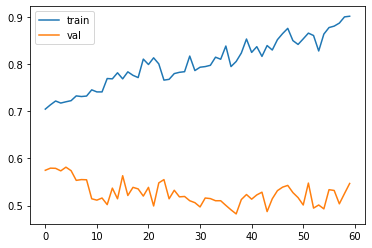

[]
Epoch 1/60
69/70 [============================>.] - ETA: 0s - loss: 0.7737 - acc: 0.7269
Epoch 00001: val_acc improved from 0.58135 to 0.61915, saving model to Model\lstm_model_trend3_1.h5
70/70 [==============================] - 7s 104ms/step - loss: 0.7734 - acc: 0.7270 - val_loss: 0.9768 - val_acc: 0.6191
Epoch 2/60
69/70 [============================>.] - ETA: 0s - loss: 0.5476 - acc: 0.7939- ETA: 3s - loss: 0 - ETA: 1s
Epoch 00002: val_acc did not improve from 0.61915
70/70 [==============================] - 7s 102ms/step - loss: 0.5475 - acc: 0.7940 - val_loss: 0.9063 - val_acc: 0.6130
Epoch 3/60
69/70 [============================>.] - ETA: 0s - loss: 0.5054 - acc: 0.7889
Epoch 00003: val_acc did not improve from 0.61915
70/70 [==============================] - 6s 84ms/step - loss: 0.5052 - acc: 0.7890 - val_loss: 0.8997 - val_acc: 0.6138
Epoch 4/60
69/70 [============================>.] - ETA: 0s - loss: 0.4920 - acc: 0.7894
Epoch 00004: val_acc did not improve from 0.61915


Epoch 32/60
69/70 [============================>.] - ETA: 0s - loss: 0.2592 - acc: 0.8954
Epoch 00032: val_acc did not improve from 0.61915
70/70 [==============================] - 7s 102ms/step - loss: 0.2591 - acc: 0.8954 - val_loss: 1.6236 - val_acc: 0.5337
Epoch 33/60
69/70 [============================>.] - ETA: 0s - loss: 0.3827 - acc: 0.8487
Epoch 00033: val_acc did not improve from 0.61915
70/70 [==============================] - 6s 85ms/step - loss: 0.3825 - acc: 0.8488 - val_loss: 1.1630 - val_acc: 0.5883
Epoch 34/60
69/70 [============================>.] - ETA: 0s - loss: 0.2868 - acc: 0.8832
Epoch 00034: val_acc did not improve from 0.61915
70/70 [==============================] - 7s 102ms/step - loss: 0.2868 - acc: 0.8832 - val_loss: 1.3918 - val_acc: 0.5538
Epoch 35/60
69/70 [============================>.] - ETA: 0s - loss: 0.2465 - acc: 0.8949- ETA: 
Epoch 00035: val_acc did not improve from 0.61915
70/70 [==============================] - 6s 84ms/step - loss: 0.2464 - 

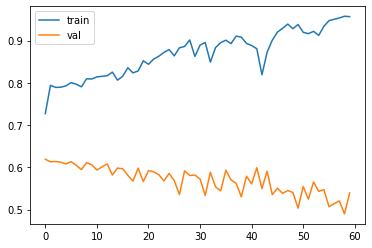

[]
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 0.8140 - acc: 0.7849
Epoch 00001: val_acc improved from 0.61915 to 0.62572, saving model to Model\lstm_model_trend3_1.h5
77/77 [==============================] - 7s 87ms/step - loss: 0.8140 - acc: 0.7849 - val_loss: 1.0487 - val_acc: 0.6257
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.4779 - acc: 0.8308
Epoch 00002: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 101ms/step - loss: 0.4779 - acc: 0.8308 - val_loss: 1.0160 - val_acc: 0.6212
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.4337 - acc: 0.8406- ETA: 2 - ETA: 0s - loss: 0.4450 - acc: 0
Epoch 00003: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 99ms/step - loss: 0.4337 - acc: 0.8406 - val_loss: 1.0288 - val_acc: 0.6122
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.4105 - acc: 0.8402
Epoch 00004: val_acc did not improve f

Epoch 32/60
77/77 [==============================] - ETA: 0s - loss: 0.0963 - acc: 0.9650- ET
Epoch 00032: val_acc did not improve from 0.62572
77/77 [==============================] - 6s 84ms/step - loss: 0.0963 - acc: 0.9650 - val_loss: 1.7413 - val_acc: 0.4260
Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0728 - acc: 0.9715- ETA: 2s - loss: 0.0929  - ETA: 1s - loss: 0.086
Epoch 00033: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 98ms/step - loss: 0.0728 - acc: 0.9715 - val_loss: 1.7663 - val_acc: 0.4437
Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: 0.1001 - acc: 0.9618
Epoch 00034: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 98ms/step - loss: 0.1001 - acc: 0.9618 - val_loss: 1.6604 - val_acc: 0.5000
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.1173 - acc: 0.9634
Epoch 00035: val_acc did not improve from 0.62572
77/77 [====================

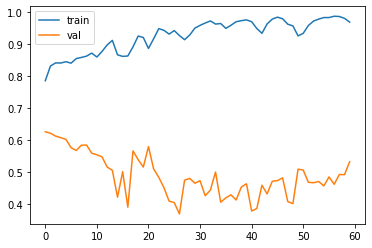

[]
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 0.4607 - acc: 0.9012- ETA: 2s - loss - ETA: 0s - loss: 0.4702 - acc: 0
Epoch 00001: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 100ms/step - loss: 0.4607 - acc: 0.9012 - val_loss: 1.8363 - val_acc: 0.6175
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.3169 - acc: 0.9268
Epoch 00002: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 99ms/step - loss: 0.3169 - acc: 0.9268 - val_loss: 1.4866 - val_acc: 0.6167
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.2675 - acc: 0.9268- ETA: 0s - loss: 0.2638 - acc: 0.929
Epoch 00003: val_acc did not improve from 0.62572
77/77 [==============================] - 6s 82ms/step - loss: 0.2675 - acc: 0.9268 - val_loss: 1.4255 - val_acc: 0.6175
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.2344 - acc: 0.9309
Epoch 00004: val_acc did not improve from 0

Epoch 32/60
77/77 [==============================] - ETA: 0s - loss: 0.0801 - acc: 0.9711
Epoch 00032: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 100ms/step - loss: 0.0801 - acc: 0.9711 - val_loss: 2.1212 - val_acc: 0.6191
Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0966 - acc: 0.9630
Epoch 00033: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 100ms/step - loss: 0.0966 - acc: 0.9630 - val_loss: 1.8657 - val_acc: 0.6122
Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: 0.0714 - acc: 0.9634
Epoch 00034: val_acc did not improve from 0.62572
77/77 [==============================] - 6s 84ms/step - loss: 0.0714 - acc: 0.9634 - val_loss: 2.0200 - val_acc: 0.6183
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.0483 - acc: 0.9805
Epoch 00035: val_acc did not improve from 0.62572
77/77 [==============================] - 8s 100ms/step - loss: 0.0483 - acc: 0

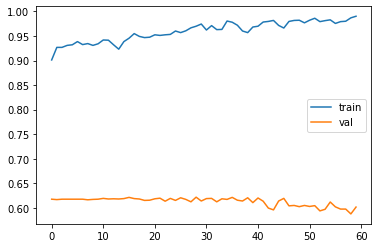

[]
Epoch 1/60
94/94 [==============================] - ETA: 0s - loss: 1.1298 - acc: 0.6892- ETA: 0s - loss: 1.1571 - acc: 0.6
Epoch 00001: val_acc did not improve from 0.62572
94/94 [==============================] - 9s 93ms/step - loss: 1.1298 - acc: 0.6892 - val_loss: 1.0082 - val_acc: 0.6027
Epoch 2/60
94/94 [==============================] - ETA: 0s - loss: 0.6496 - acc: 0.7272
Epoch 00002: val_acc did not improve from 0.62572
94/94 [==============================] - 9s 93ms/step - loss: 0.6496 - acc: 0.7272 - val_loss: 0.9423 - val_acc: 0.6027
Epoch 3/60
94/94 [==============================] - ETA: 0s - loss: 0.6104 - acc: 0.7209
Epoch 00003: val_acc did not improve from 0.62572
94/94 [==============================] - 8s 80ms/step - loss: 0.6104 - acc: 0.7209 - val_loss: 0.9644 - val_acc: 0.6167
Epoch 4/60
94/94 [==============================] - ETA: 0s - loss: 0.5841 - acc: 0.7455
Epoch 00004: val_acc did not improve from 0.62572
94/94 [==============================] - 9s 96

Epoch 32/60
94/94 [==============================] - ETA: 0s - loss: 0.1472 - acc: 0.9497
Epoch 00032: val_acc did not improve from 0.62572
94/94 [==============================] - 8s 82ms/step - loss: 0.1472 - acc: 0.9497 - val_loss: 2.0588 - val_acc: 0.5937
Epoch 33/60
94/94 [==============================] - ETA: 0s - loss: 0.1407 - acc: 0.9447
Epoch 00033: val_acc did not improve from 0.62572
94/94 [==============================] - 9s 94ms/step - loss: 0.1407 - acc: 0.9447 - val_loss: 2.1581 - val_acc: 0.5896
Epoch 34/60
94/94 [==============================] - ETA: 0s - loss: 0.1038 - acc: 0.9660
Epoch 00034: val_acc did not improve from 0.62572
94/94 [==============================] - 9s 95ms/step - loss: 0.1038 - acc: 0.9660 - val_loss: 2.2030 - val_acc: 0.5929
Epoch 35/60
94/94 [==============================] - ETA: 0s - loss: 0.1035 - acc: 0.9627- ETA: 4s - loss: 0.1609 - ac
Epoch 00035: val_acc did not improve from 0.62572
94/94 [==============================] - 9s 94ms/st

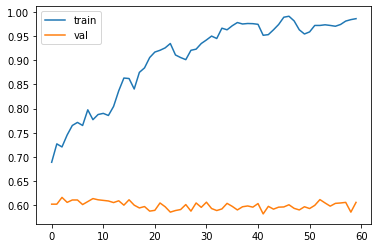

[]
Epoch 1/60
76/77 [============================>.] - ETA: 0s - loss: 0.8715 - acc: 0.7294
Epoch 00001: val_acc did not improve from 0.62572
77/77 [==============================] - 5s 67ms/step - loss: 0.8624 - acc: 0.7324 - val_loss: 1.2653 - val_acc: 0.6064
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.4503 - acc: 0.7975
Epoch 00002: val_acc did not improve from 0.62572
77/77 [==============================] - 6s 80ms/step - loss: 0.4503 - acc: 0.7975 - val_loss: 1.1555 - val_acc: 0.6109
Epoch 3/60
76/77 [============================>.] - ETA: 0s - loss: 0.3642 - acc: 0.8215
Epoch 00003: val_acc did not improve from 0.62572
77/77 [==============================] - 5s 67ms/step - loss: 0.3604 - acc: 0.8235 - val_loss: 1.1589 - val_acc: 0.6060
Epoch 4/60
76/77 [============================>.] - ETA: 0s - loss: 0.3072 - acc: 0.8569
Epoch 00004: val_acc did not improve from 0.62572
77/77 [==============================] - 6s 78ms/step - loss: 0.3041 - acc: 0.858

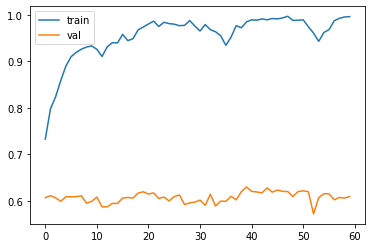

[]
Epoch 1/60
76/77 [============================>.] - ETA: 0s - loss: 0.9570 - acc: 0.7484
Epoch 00001: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 62ms/step - loss: 0.9572 - acc: 0.7479 - val_loss: 1.3487 - val_acc: 0.5707
Epoch 2/60
76/77 [============================>.] - ETA: 0s - loss: 0.5246 - acc: 0.8030
Epoch 00002: val_acc did not improve from 0.62942
77/77 [==============================] - 6s 72ms/step - loss: 0.5279 - acc: 0.8020 - val_loss: 1.1520 - val_acc: 0.6249
Epoch 3/60
76/77 [============================>.] - ETA: 0s - loss: 0.4038 - acc: 0.8442- ETA: 2s - loss: 0
Epoch 00003: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 66ms/step - loss: 0.4068 - acc: 0.8426 - val_loss: 1.2049 - val_acc: 0.6126
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.3368 - acc: 0.8613
Epoch 00004: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 63ms/step - loss: 

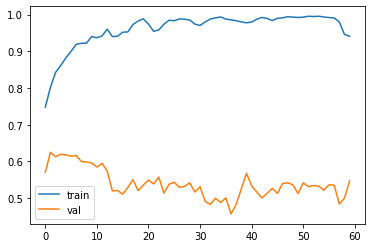

[]
Epoch 1/60
76/77 [============================>.] - ETA: 0s - loss: 0.6159 - acc: 0.8425
Epoch 00001: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 62ms/step - loss: 0.6246 - acc: 0.8381 - val_loss: 1.6199 - val_acc: 0.5152
Epoch 2/60
76/77 [============================>.] - ETA: 0s - loss: 0.3223 - acc: 0.8857
Epoch 00002: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 62ms/step - loss: 0.3283 - acc: 0.8829 - val_loss: 1.7137 - val_acc: 0.5255
Epoch 3/60
76/77 [============================>.] - ETA: 0s - loss: 0.2589 - acc: 0.8951
Epoch 00003: val_acc did not improve from 0.62942
77/77 [==============================] - 6s 76ms/step - loss: 0.2652 - acc: 0.8914 - val_loss: 1.8308 - val_acc: 0.5131
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.2179 - acc: 0.9203
Epoch 00004: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 62ms/step - loss: 0.2179 - acc: 0.920

Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0706 - acc: 0.9740
Epoch 00033: val_acc did not improve from 0.62942
77/77 [==============================] - 6s 77ms/step - loss: 0.0706 - acc: 0.9740 - val_loss: 2.7396 - val_acc: 0.5197
Epoch 34/60
76/77 [============================>.] - ETA: 0s - loss: 0.0525 - acc: 0.9836
Epoch 00034: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 63ms/step - loss: 0.0532 - acc: 0.9833 - val_loss: 2.6692 - val_acc: 0.5090
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.0882 - acc: 0.9711
Epoch 00035: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 62ms/step - loss: 0.0882 - acc: 0.9711 - val_loss: 2.4340 - val_acc: 0.5012
Epoch 36/60
76/77 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9790
Epoch 00036: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 62ms/step - loss: 0.0675 - acc: 0.97

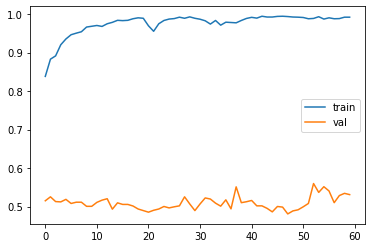

[]
Epoch 1/60
76/77 [============================>.] - ETA: 0s - loss: 0.7701 - acc: 0.8294
Epoch 00001: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 65ms/step - loss: 0.7620 - acc: 0.8312 - val_loss: 1.9818 - val_acc: 0.6072
Epoch 2/60
76/77 [============================>.] - ETA: 0s - loss: 0.3693 - acc: 0.8828
Epoch 00002: val_acc did not improve from 0.62942
77/77 [==============================] - 6s 77ms/step - loss: 0.3661 - acc: 0.8841 - val_loss: 1.6101 - val_acc: 0.6027
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.2770 - acc: 0.9024
Epoch 00003: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 63ms/step - loss: 0.2770 - acc: 0.9024 - val_loss: 1.6838 - val_acc: 0.6163
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.2268 - acc: 0.9215
Epoch 00004: val_acc did not improve from 0.62942
77/77 [==============================] - 5s 63ms/step - loss: 0.2268 - acc: 0.921

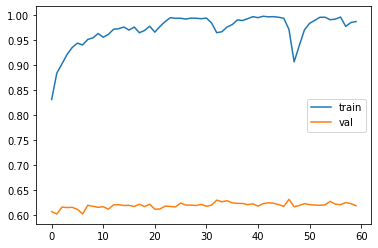

[]
Epoch 1/60
86/86 [==============================] - ETA: 0s - loss: 0.8101 - acc: 0.7536
Epoch 00001: val_acc did not improve from 0.63188
86/86 [==============================] - 5s 63ms/step - loss: 0.8101 - acc: 0.7536 - val_loss: 1.3831 - val_acc: 0.6007
Epoch 2/60
85/86 [============================>.] - ETA: 0s - loss: 0.4146 - acc: 0.8202
Epoch 00002: val_acc did not improve from 0.63188
86/86 [==============================] - 6s 75ms/step - loss: 0.4131 - acc: 0.8209 - val_loss: 1.3598 - val_acc: 0.6068
Epoch 3/60
85/86 [============================>.] - ETA: 0s - loss: 0.3410 - acc: 0.8518
Epoch 00003: val_acc did not improve from 0.63188
86/86 [==============================] - 5s 61ms/step - loss: 0.3398 - acc: 0.8524 - val_loss: 1.4106 - val_acc: 0.5941
Epoch 4/60
86/86 [==============================] - ETA: 0s - loss: 0.2738 - acc: 0.8956- ETA: 0s - loss: 0.2763 - acc: 0.895
Epoch 00004: val_acc did not improve from 0.63188
86/86 [==============================] - 5s 

85/86 [============================>.] - ETA: 0s - loss: 0.0254 - acc: 0.9912- ETA: 2s - loss:
Epoch 00032: val_acc did not improve from 0.63188
86/86 [==============================] - 6s 68ms/step - loss: 0.0253 - acc: 0.9912 - val_loss: 2.3630 - val_acc: 0.6159
Epoch 33/60
86/86 [==============================] - ETA: 0s - loss: 0.0197 - acc: 0.9927
Epoch 00033: val_acc did not improve from 0.63188
86/86 [==============================] - 5s 61ms/step - loss: 0.0197 - acc: 0.9927 - val_loss: 2.4855 - val_acc: 0.6179
Epoch 34/60
85/86 [============================>.] - ETA: 0s - loss: 0.0257 - acc: 0.9915
Epoch 00034: val_acc did not improve from 0.63188
86/86 [==============================] - 5s 61ms/step - loss: 0.0256 - acc: 0.9916 - val_loss: 2.3614 - val_acc: 0.6146
Epoch 35/60
86/86 [==============================] - ETA: 0s - loss: 0.0432 - acc: 0.9865
Epoch 00035: val_acc did not improve from 0.63188
86/86 [==============================] - 7s 77ms/step - loss: 0.0432 - acc:

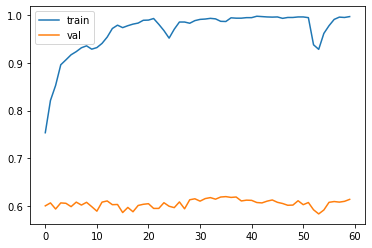

[]
Epoch 1/60
75/76 [============================>.] - ETA: 0s - loss: 1.3574 - acc: 0.6175
Epoch 00001: val_acc did not improve from 0.63188
76/76 [==============================] - 3s 43ms/step - loss: 1.3550 - acc: 0.6185 - val_loss: 1.3975 - val_acc: 0.6159
Epoch 2/60
75/76 [============================>.] - ETA: 0s - loss: 0.7122 - acc: 0.6579
Epoch 00002: val_acc did not improve from 0.63188
76/76 [==============================] - 3s 43ms/step - loss: 0.7107 - acc: 0.6588 - val_loss: 1.2709 - val_acc: 0.6089
Epoch 3/60
75/76 [============================>.] - ETA: 0s - loss: 0.6250 - acc: 0.6896
Epoch 00003: val_acc did not improve from 0.63188
76/76 [==============================] - 3s 43ms/step - loss: 0.6237 - acc: 0.6904 - val_loss: 1.2404 - val_acc: 0.6105
Epoch 4/60
75/76 [============================>.] - ETA: 0s - loss: 0.5688 - acc: 0.7283
Epoch 00004: val_acc did not improve from 0.63188
76/76 [==============================] - 3s 42ms/step - loss: 0.5676 - acc: 0.729

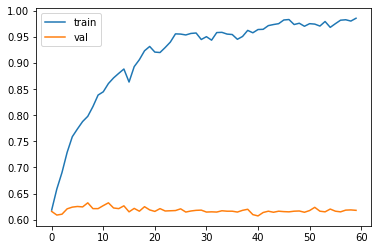

[]
Epoch 1/60
85/86 [============================>.] - ETA: 0s - loss: 0.4984 - acc: 0.8996
Epoch 00001: val_acc did not improve from 0.63229
86/86 [==============================] - 4s 41ms/step - loss: 0.4966 - acc: 0.9000 - val_loss: 2.2661 - val_acc: 0.6196
Epoch 2/60
85/86 [============================>.] - ETA: 0s - loss: 0.2760 - acc: 0.9232
Epoch 00002: val_acc did not improve from 0.63229
86/86 [==============================] - 4s 41ms/step - loss: 0.2750 - acc: 0.9234 - val_loss: 1.9691 - val_acc: 0.6216
Epoch 3/60
85/86 [============================>.] - ETA: 0s - loss: 0.2315 - acc: 0.9379
Epoch 00003: val_acc did not improve from 0.63229
86/86 [==============================] - 4s 41ms/step - loss: 0.2307 - acc: 0.9381 - val_loss: 2.1422 - val_acc: 0.6237
Epoch 4/60
85/86 [============================>.] - ETA: 0s - loss: 0.2094 - acc: 0.9419
Epoch 00004: val_acc did not improve from 0.63229
86/86 [==============================] - 4s 41ms/step - loss: 0.2087 - acc: 0.942

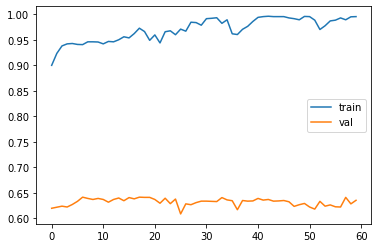

[]
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 0.6427 - acc: 0.8593
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.6427 - acc: 0.8593 - val_loss: 2.0820 - val_acc: 0.5797
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.3626 - acc: 0.8764
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 45ms/step - loss: 0.3626 - acc: 0.8764 - val_loss: 1.9989 - val_acc: 0.6163
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.2704 - acc: 0.8914
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 4s 50ms/step - loss: 0.2704 - acc: 0.8914 - val_loss: 1.8977 - val_acc: 0.6282
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.2192 - acc: 0.9077
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 4s 49ms/step - loss: 0.2192 - acc: 0.907

Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0230 - acc: 0.9939
Epoch 00033: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.0230 - acc: 0.9939 - val_loss: 2.9928 - val_acc: 0.6270
Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: 0.0163 - acc: 0.9943
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.0163 - acc: 0.9943 - val_loss: 3.0319 - val_acc: 0.6294
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.0209 - acc: 0.9911
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 4s 46ms/step - loss: 0.0209 - acc: 0.9911 - val_loss: 2.9154 - val_acc: 0.6311
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: 0.0365 - acc: 0.9866
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.0365 - acc: 0.98

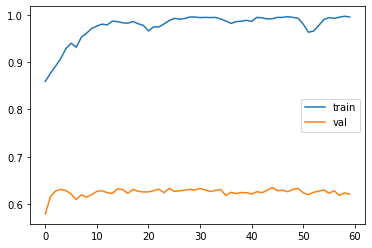

[]
Epoch 1/60
89/90 [============================>.] - ETA: 0s - loss: 0.9846 - acc: 0.6847
Epoch 00001: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: 0.9819 - acc: 0.6858 - val_loss: 2.0724 - val_acc: 0.5316
Epoch 2/60
89/90 [============================>.] - ETA: 0s - loss: 0.6396 - acc: 0.7412
Epoch 00002: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: 0.6381 - acc: 0.7421 - val_loss: 1.8778 - val_acc: 0.5353
Epoch 3/60
89/90 [============================>.] - ETA: 0s - loss: 0.5567 - acc: 0.7686
Epoch 00003: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: 0.5556 - acc: 0.7694 - val_loss: 1.8820 - val_acc: 0.5271
Epoch 4/60
90/90 [==============================] - ETA: 0s - loss: 0.5149 - acc: 0.7733
Epoch 00004: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 44ms/step - loss: 0.5149 - acc: 0.773

Epoch 33/60
89/90 [============================>.] - ETA: 0s - loss: 0.1362 - acc: 0.9505
Epoch 00033: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: 0.1358 - acc: 0.9507 - val_loss: 2.4244 - val_acc: 0.5390
Epoch 34/60
89/90 [============================>.] - ETA: 0s - loss: 0.1131 - acc: 0.9645
Epoch 00034: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 44ms/step - loss: 0.1128 - acc: 0.9647 - val_loss: 2.4830 - val_acc: 0.5448
Epoch 35/60
89/90 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9744
Epoch 00035: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 42ms/step - loss: 0.0729 - acc: 0.9745 - val_loss: 2.4687 - val_acc: 0.5333
Epoch 36/60
89/90 [============================>.] - ETA: 0s - loss: 0.0502 - acc: 0.9831
Epoch 00036: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: 0.0500 - acc: 0.98

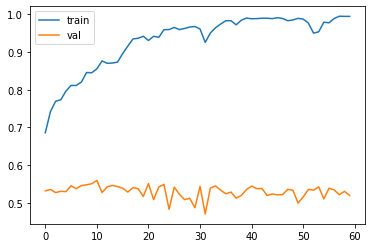

[]
Epoch 1/60
81/81 [==============================] - ETA: 0s - loss: 1.0465 - acc: 0.7381
Epoch 00001: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 1.0465 - acc: 0.7381 - val_loss: 1.7603 - val_acc: 0.5686
Epoch 2/60
81/81 [==============================] - ETA: 0s - loss: 0.5390 - acc: 0.7845
Epoch 00002: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.5390 - acc: 0.7845 - val_loss: 1.4960 - val_acc: 0.5933
Epoch 3/60
81/81 [==============================] - ETA: 0s - loss: 0.3999 - acc: 0.8513
Epoch 00003: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.3999 - acc: 0.8513 - val_loss: 1.4740 - val_acc: 0.5871
Epoch 4/60
81/81 [==============================] - ETA: 0s - loss: 0.3369 - acc: 0.8790
Epoch 00004: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.3369 - acc: 0.879

Epoch 33/60
81/81 [==============================] - ETA: 0s - loss: 0.0370 - acc: 0.9859
Epoch 00033: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.0370 - acc: 0.9859 - val_loss: 2.5581 - val_acc: 0.6130
Epoch 34/60
81/81 [==============================] - ETA: 0s - loss: 0.0593 - acc: 0.9797
Epoch 00034: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.0593 - acc: 0.9797 - val_loss: 2.5449 - val_acc: 0.6142
Epoch 35/60
81/81 [==============================] - ETA: 0s - loss: 0.0797 - acc: 0.9778
Epoch 00035: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.0797 - acc: 0.9778 - val_loss: 2.1615 - val_acc: 0.6298
Epoch 36/60
81/81 [==============================] - ETA: 0s - loss: 0.0497 - acc: 0.9832
Epoch 00036: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.0497 - acc: 0.98

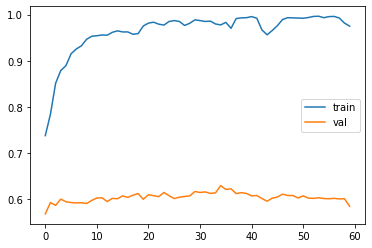

[]
['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 1.4821 - acc: 0.6564
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 1.4821 - acc: 0.6564 - val_loss: 1.3349 - val_acc: 0.5883
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.7695 - acc: 0.7109
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.7695 - acc: 0.7109 - val_loss: 1.1121 - val_acc: 0.5867
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.6491 - acc: 0.6991
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.6491 - acc: 0.6991 - val_loss: 1.0633 - val_acc: 0.5986
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.5470 - acc: 0.7458
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/

Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0902 - acc: 0.9691
Epoch 00033: val_acc did not improve from 0.64133
77/77 [==============================] - 4s 46ms/step - loss: 0.0902 - acc: 0.9691 - val_loss: 2.0281 - val_acc: 0.5370
Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: 0.0777 - acc: 0.9744
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.0777 - acc: 0.9744 - val_loss: 2.0740 - val_acc: 0.5382
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.1290 - acc: 0.9492
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.1290 - acc: 0.9492 - val_loss: 1.9241 - val_acc: 0.5698
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: 0.0959 - acc: 0.9642
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.0959 - acc: 0.96

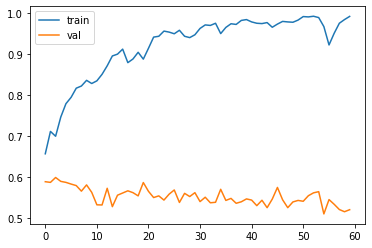

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 0.8500 - acc: 0.7719
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.8500 - acc: 0.7719 - val_loss: 1.6885 - val_acc: 0.5871
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.4639 - acc: 0.8264
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.4639 - acc: 0.8264 - val_loss: 1.6571 - val_acc: 0.5801
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.3578 - acc: 0.8670
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.3578 - acc: 0.8670 - val_loss: 1.5983 - val_acc: 0.5793
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.3200 - acc: 0.8808
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/ste

Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0632 - acc: 0.9768
Epoch 00033: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.0632 - acc: 0.9768 - val_loss: 2.4017 - val_acc: 0.5760
Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: 0.0568 - acc: 0.9801
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.0568 - acc: 0.9801 - val_loss: 2.3483 - val_acc: 0.5801
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.0413 - acc: 0.9874
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.0413 - acc: 0.9874 - val_loss: 2.3718 - val_acc: 0.5748
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: 0.0270 - acc: 0.9923
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 4s 45ms/step - loss: 0.0270 - acc: 0.99

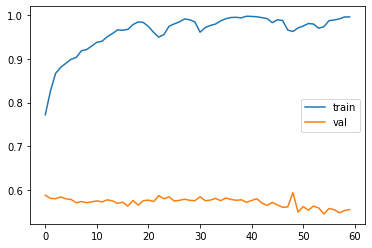

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
87/87 [==============================] - ETA: 0s - loss: 0.7955 - acc: 0.8417
Epoch 00001: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 45ms/step - loss: 0.7955 - acc: 0.8417 - val_loss: 1.7628 - val_acc: 0.6085
Epoch 2/60
87/87 [==============================] - ETA: 0s - loss: 0.3872 - acc: 0.8713
Epoch 00002: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 43ms/step - loss: 0.3872 - acc: 0.8713 - val_loss: 1.6410 - val_acc: 0.6039
Epoch 3/60
87/87 [==============================] - ETA: 0s - loss: 0.2867 - acc: 0.9059
Epoch 00003: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/step - loss: 0.2867 - acc: 0.9059 - val_loss: 1.4846 - val_acc: 0.6060
Epoch 4/60
87/87 [==============================] - ETA: 0s - loss: 0.2348 - acc: 0.9185
Epoch 00004: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/ste

Epoch 33/60
87/87 [==============================] - ETA: 0s - loss: 0.0166 - acc: 0.9960
Epoch 00033: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/step - loss: 0.0166 - acc: 0.9960 - val_loss: 2.4773 - val_acc: 0.6294
Epoch 34/60
87/87 [==============================] - ETA: 0s - loss: 0.0167 - acc: 0.9953
Epoch 00034: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 42ms/step - loss: 0.0167 - acc: 0.9953 - val_loss: 2.5458 - val_acc: 0.6245
Epoch 35/60
87/87 [==============================] - ETA: 0s - loss: 0.0121 - acc: 0.9957
Epoch 00035: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 45ms/step - loss: 0.0121 - acc: 0.9957 - val_loss: 2.6314 - val_acc: 0.6261
Epoch 36/60
87/87 [==============================] - ETA: 0s - loss: 0.0087 - acc: 0.9982
Epoch 00036: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 42ms/step - loss: 0.0087 - acc: 0.99

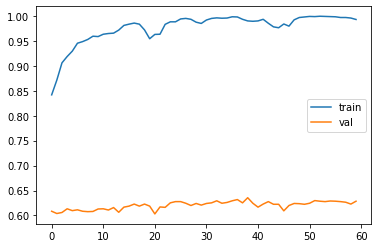

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
81/81 [==============================] - ETA: 0s - loss: 0.8818 - acc: 0.7561
Epoch 00001: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.8818 - acc: 0.7561 - val_loss: 1.6678 - val_acc: 0.6056
Epoch 2/60
81/81 [==============================] - ETA: 0s - loss: 0.4928 - acc: 0.8166
Epoch 00002: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.4928 - acc: 0.8166 - val_loss: 1.2321 - val_acc: 0.6113
Epoch 3/60
81/81 [==============================] - ETA: 0s - loss: 0.4148 - acc: 0.8233
Epoch 00003: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 43ms/step - loss: 0.4148 - acc: 0.8233 - val_loss: 1.2504 - val_acc: 0.6093
Epoch 4/60
81/81 [==============================] - ETA: 0s - loss: 0.2984 - acc: 0.8783
Epoch 00004: val_acc did not improve from 0.64133
81/81 [==============================] - 4s 45ms/ste

Epoch 33/60
81/81 [==============================] - ETA: 0s - loss: 0.0284 - acc: 0.9902
Epoch 00033: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.0284 - acc: 0.9902 - val_loss: 2.5539 - val_acc: 0.5986
Epoch 34/60
81/81 [==============================] - ETA: 0s - loss: 0.0295 - acc: 0.9899
Epoch 00034: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 41ms/step - loss: 0.0295 - acc: 0.9899 - val_loss: 2.6314 - val_acc: 0.6068
Epoch 35/60
81/81 [==============================] - ETA: 0s - loss: 0.0247 - acc: 0.9918
Epoch 00035: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: 0.0247 - acc: 0.9918 - val_loss: 2.6311 - val_acc: 0.6019
Epoch 36/60
81/81 [==============================] - ETA: 0s - loss: 0.0197 - acc: 0.9941
Epoch 00036: val_acc did not improve from 0.64133
81/81 [==============================] - 4s 45ms/step - loss: 0.0197 - acc: 0.99

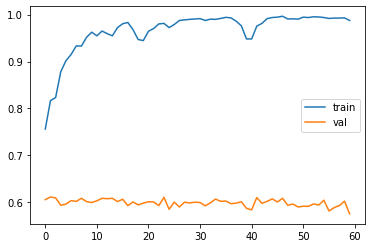

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 0.8872 - acc: 0.7466
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.8872 - acc: 0.7466 - val_loss: 1.4282 - val_acc: 0.6097
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.5131 - acc: 0.7893
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.5131 - acc: 0.7893 - val_loss: 1.2967 - val_acc: 0.6220
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.4277 - acc: 0.8231
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.4277 - acc: 0.8231 - val_loss: 1.2864 - val_acc: 0.6105
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.3662 - acc: 0.8495
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/ste

Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0943 - acc: 0.9622
Epoch 00033: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.0943 - acc: 0.9622 - val_loss: 2.3775 - val_acc: 0.6171
Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: 0.1612 - acc: 0.9435
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 4s 46ms/step - loss: 0.1612 - acc: 0.9435 - val_loss: 2.1515 - val_acc: 0.6035
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.1108 - acc: 0.9553
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.1108 - acc: 0.9553 - val_loss: 2.2612 - val_acc: 0.5957
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: 0.1205 - acc: 0.9524
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.1205 - acc: 0.95

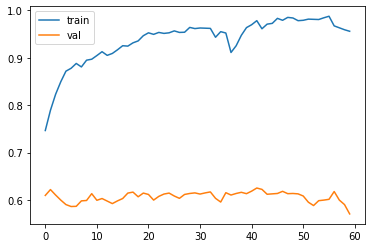

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
87/87 [==============================] - ETA: 0s - loss: 0.7900 - acc: 0.7708
Epoch 00001: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 45ms/step - loss: 0.7900 - acc: 0.7708 - val_loss: 1.7102 - val_acc: 0.5822
Epoch 2/60
87/87 [==============================] - ETA: 0s - loss: 0.4955 - acc: 0.8275
Epoch 00002: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/step - loss: 0.4955 - acc: 0.8275 - val_loss: 1.5591 - val_acc: 0.5514
Epoch 3/60
87/87 [==============================] - ETA: 0s - loss: 0.3616 - acc: 0.8456
Epoch 00003: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/step - loss: 0.3616 - acc: 0.8456 - val_loss: 1.6090 - val_acc: 0.5596
Epoch 4/60
87/87 [==============================] - ETA: 0s - loss: 0.3134 - acc: 0.8602
Epoch 00004: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/ste

Epoch 33/60
87/87 [==============================] - ETA: 0s - loss: 0.0857 - acc: 0.9666
Epoch 00033: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 42ms/step - loss: 0.0857 - acc: 0.9666 - val_loss: 2.3318 - val_acc: 0.5801
Epoch 34/60
87/87 [==============================] - ETA: 0s - loss: 0.1488 - acc: 0.9604
Epoch 00034: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/step - loss: 0.1488 - acc: 0.9604 - val_loss: 2.5022 - val_acc: 0.5156
Epoch 35/60
87/87 [==============================] - ETA: 0s - loss: 0.0431 - acc: 0.9873
Epoch 00035: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/step - loss: 0.0431 - acc: 0.9873 - val_loss: 2.5459 - val_acc: 0.5168
Epoch 36/60
87/87 [==============================] - ETA: 0s - loss: 0.0278 - acc: 0.9909
Epoch 00036: val_acc did not improve from 0.64133
87/87 [==============================] - 4s 41ms/step - loss: 0.0278 - acc: 0.99

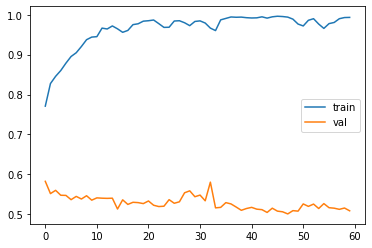

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
87/88 [============================>.] - ETA: 0s - loss: 1.1793 - acc: 0.6437
Epoch 00001: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 42ms/step - loss: 1.1760 - acc: 0.6447 - val_loss: 1.6341 - val_acc: 0.5407
Epoch 2/60
87/88 [============================>.] - ETA: 0s - loss: 0.7278 - acc: 0.6735
Epoch 00002: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 41ms/step - loss: 0.7259 - acc: 0.6744 - val_loss: 1.5345 - val_acc: 0.5456
Epoch 3/60
87/88 [============================>.] - ETA: 0s - loss: 0.5931 - acc: 0.7295
Epoch 00003: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 41ms/step - loss: 0.5918 - acc: 0.7303 - val_loss: 1.5531 - val_acc: 0.5452
Epoch 4/60
87/88 [============================>.] - ETA: 0s - loss: 0.5222 - acc: 0.7651
Epoch 00004: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 41ms/ste

Epoch 33/60
87/88 [============================>.] - ETA: 0s - loss: 0.0747 - acc: 0.9745
Epoch 00033: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 41ms/step - loss: 0.0745 - acc: 0.9746 - val_loss: 2.4864 - val_acc: 0.5164
Epoch 34/60
87/88 [============================>.] - ETA: 0s - loss: 0.0848 - acc: 0.9691
Epoch 00034: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 42ms/step - loss: 0.0846 - acc: 0.9692 - val_loss: 2.4137 - val_acc: 0.5247
Epoch 35/60
87/88 [============================>.] - ETA: 0s - loss: 0.0782 - acc: 0.9705
Epoch 00035: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 44ms/step - loss: 0.0779 - acc: 0.9706 - val_loss: 2.4717 - val_acc: 0.5090
Epoch 36/60
87/88 [============================>.] - ETA: 0s - loss: 0.0638 - acc: 0.9759
Epoch 00036: val_acc did not improve from 0.64133
88/88 [==============================] - 4s 41ms/step - loss: 0.0636 - acc: 0.97

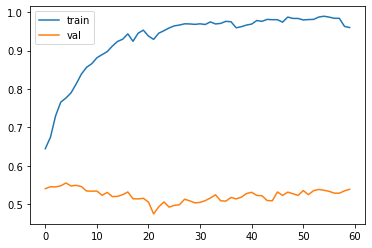

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
79/80 [============================>.] - ETA: 0s - loss: 1.3830 - acc: 0.6883
Epoch 00001: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: 1.3756 - acc: 0.6897 - val_loss: 1.8003 - val_acc: 0.5666
Epoch 2/60
79/80 [============================>.] - ETA: 0s - loss: 0.7142 - acc: 0.7682
Epoch 00002: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: 0.7103 - acc: 0.7696 - val_loss: 1.5731 - val_acc: 0.5657
Epoch 3/60
79/80 [============================>.] - ETA: 0s - loss: 0.5067 - acc: 0.8244
Epoch 00003: val_acc did not improve from 0.64133
80/80 [==============================] - 4s 45ms/step - loss: 0.5040 - acc: 0.8254 - val_loss: 1.4953 - val_acc: 0.5703
Epoch 4/60
79/80 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8501
Epoch 00004: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/ste

Epoch 33/60
79/80 [============================>.] - ETA: 0s - loss: 0.0673 - acc: 0.9771
Epoch 00033: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: 0.0669 - acc: 0.9772 - val_loss: 2.3110 - val_acc: 0.5629
Epoch 34/60
79/80 [============================>.] - ETA: 0s - loss: 0.0803 - acc: 0.9715
Epoch 00034: val_acc did not improve from 0.64133
80/80 [==============================] - 4s 45ms/step - loss: 0.0799 - acc: 0.9717 - val_loss: 2.4968 - val_acc: 0.5444
Epoch 35/60
79/80 [============================>.] - ETA: 0s - loss: 0.1328 - acc: 0.9589
Epoch 00035: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: 0.1320 - acc: 0.9591 - val_loss: 2.2429 - val_acc: 0.5485
Epoch 36/60
79/80 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9656
Epoch 00036: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 41ms/step - loss: 0.0980 - acc: 0.96

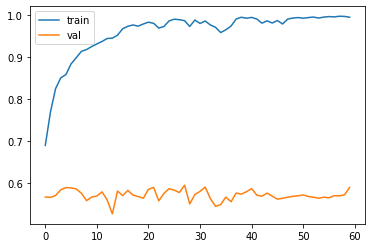

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
101/101 [==============================] - ETA: 0s - loss: 1.5015 - acc: 0.6266
Epoch 00001: val_acc did not improve from 0.64133
101/101 [==============================] - 4s 40ms/step - loss: 1.5015 - acc: 0.6266 - val_loss: 1.3215 - val_acc: 0.6113
Epoch 2/60
101/101 [==============================] - ETA: 0s - loss: 0.7239 - acc: 0.6907
Epoch 00002: val_acc did not improve from 0.64133
101/101 [==============================] - 4s 40ms/step - loss: 0.7239 - acc: 0.6907 - val_loss: 1.1942 - val_acc: 0.6154
Epoch 3/60
101/101 [==============================] - ETA: 0s - loss: 0.6768 - acc: 0.7019
Epoch 00003: val_acc did not improve from 0.64133
101/101 [==============================] - 4s 40ms/step - loss: 0.6768 - acc: 0.7019 - val_loss: 1.1374 - val_acc: 0.6093
Epoch 4/60
101/101 [==============================] - ETA: 0s - loss: 0.5945 - acc: 0.7405
Epoch 00004: val_acc did not improve from 0.64133
101/101 [=============================

Epoch 32/60
101/101 [==============================] - ETA: 0s - loss: 0.1192 - acc: 0.9586
Epoch 00032: val_acc did not improve from 0.64133
101/101 [==============================] - 4s 41ms/step - loss: 0.1192 - acc: 0.9586 - val_loss: 2.2478 - val_acc: 0.5678
Epoch 33/60
101/101 [==============================] - ETA: 0s - loss: 0.1353 - acc: 0.9540
Epoch 00033: val_acc did not improve from 0.64133
101/101 [==============================] - 4s 43ms/step - loss: 0.1353 - acc: 0.9540 - val_loss: 2.2502 - val_acc: 0.5514
Epoch 34/60
101/101 [==============================] - ETA: 0s - loss: 0.0953 - acc: 0.9683
Epoch 00034: val_acc did not improve from 0.64133
101/101 [==============================] - 4s 40ms/step - loss: 0.0953 - acc: 0.9683 - val_loss: 2.3457 - val_acc: 0.5320
Epoch 35/60
101/101 [==============================] - ETA: 0s - loss: 0.0537 - acc: 0.9841
Epoch 00035: val_acc did not improve from 0.64133
101/101 [==============================] - 4s 40ms/step - loss: 0.

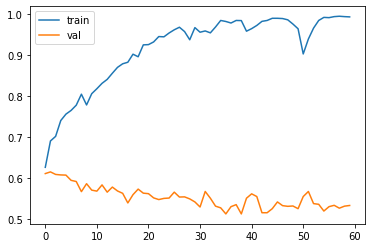

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/78 [============================>.] - ETA: 0s - loss: 1.0756 - acc: 0.7804
Epoch 00001: val_acc did not improve from 0.64133
78/78 [==============================] - 4s 46ms/step - loss: 1.0745 - acc: 0.7807 - val_loss: 1.8106 - val_acc: 0.5477
Epoch 2/60
77/78 [============================>.] - ETA: 0s - loss: 0.5795 - acc: 0.8178
Epoch 00002: val_acc did not improve from 0.64133
78/78 [==============================] - 3s 42ms/step - loss: 0.5788 - acc: 0.8180 - val_loss: 1.4476 - val_acc: 0.5900
Epoch 3/60
77/78 [============================>.] - ETA: 0s - loss: 0.4147 - acc: 0.8511
Epoch 00003: val_acc did not improve from 0.64133
78/78 [==============================] - 3s 42ms/step - loss: 0.4142 - acc: 0.8512 - val_loss: 1.4464 - val_acc: 0.5998
Epoch 4/60
77/78 [============================>.] - ETA: 0s - loss: 0.3442 - acc: 0.8770
Epoch 00004: val_acc did not improve from 0.64133
78/78 [==============================] - 3s 42ms/ste

Epoch 33/60
77/78 [============================>.] - ETA: 0s - loss: 0.0720 - acc: 0.9756
Epoch 00033: val_acc did not improve from 0.64133
78/78 [==============================] - 3s 42ms/step - loss: 0.0719 - acc: 0.9757 - val_loss: 2.3693 - val_acc: 0.5875
Epoch 34/60
77/78 [============================>.] - ETA: 0s - loss: 0.0779 - acc: 0.9704
Epoch 00034: val_acc did not improve from 0.64133
78/78 [==============================] - 3s 42ms/step - loss: 0.0778 - acc: 0.9704 - val_loss: 2.3984 - val_acc: 0.6007
Epoch 35/60
77/78 [============================>.] - ETA: 0s - loss: 0.1048 - acc: 0.9671
Epoch 00035: val_acc did not improve from 0.64133
78/78 [==============================] - 3s 42ms/step - loss: 0.1047 - acc: 0.9672 - val_loss: 2.3639 - val_acc: 0.5941
Epoch 36/60
77/78 [============================>.] - ETA: 0s - loss: 0.0814 - acc: 0.9708
Epoch 00036: val_acc did not improve from 0.64133
78/78 [==============================] - 4s 45ms/step - loss: 0.0813 - acc: 0.97

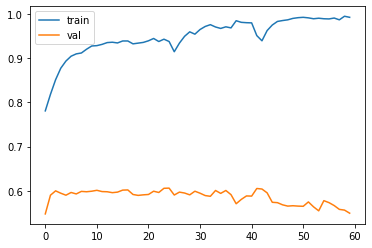

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 1.1047 - acc: 0.7767
Epoch 00001: val_acc did not improve from 0.64133
79/79 [==============================] - 4s 47ms/step - loss: 1.1047 - acc: 0.7767 - val_loss: 1.6436 - val_acc: 0.5929
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 0.4761 - acc: 0.8457
Epoch 00002: val_acc did not improve from 0.64133
79/79 [==============================] - 3s 42ms/step - loss: 0.4761 - acc: 0.8457 - val_loss: 1.4533 - val_acc: 0.5924
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.3857 - acc: 0.8703
Epoch 00003: val_acc did not improve from 0.64133
79/79 [==============================] - 3s 42ms/step - loss: 0.3857 - acc: 0.8703 - val_loss: 1.4267 - val_acc: 0.5879
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.3165 - acc: 0.8834
Epoch 00004: val_acc did not improve from 0.64133
79/79 [==============================] - 3s 43ms/ste

Epoch 33/60
79/79 [==============================] - ETA: 0s - loss: 0.0220 - acc: 0.9925
Epoch 00033: val_acc did not improve from 0.64133
79/79 [==============================] - 3s 42ms/step - loss: 0.0220 - acc: 0.9925 - val_loss: 2.4854 - val_acc: 0.5629
Epoch 34/60
79/79 [==============================] - ETA: 0s - loss: 0.0322 - acc: 0.9913
Epoch 00034: val_acc did not improve from 0.64133
79/79 [==============================] - 3s 44ms/step - loss: 0.0322 - acc: 0.9913 - val_loss: 2.4835 - val_acc: 0.5666
Epoch 35/60
79/79 [==============================] - ETA: 0s - loss: 0.0250 - acc: 0.9905
Epoch 00035: val_acc did not improve from 0.64133
79/79 [==============================] - 3s 43ms/step - loss: 0.0250 - acc: 0.9905 - val_loss: 2.4281 - val_acc: 0.5600
Epoch 36/60
79/79 [==============================] - ETA: 0s - loss: 0.0354 - acc: 0.9897
Epoch 00036: val_acc did not improve from 0.64133
79/79 [==============================] - 4s 46ms/step - loss: 0.0354 - acc: 0.98

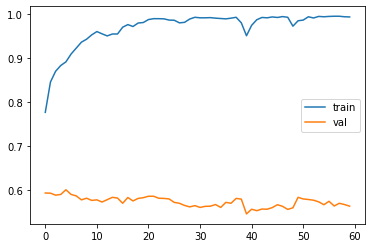

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
85/86 [============================>.] - ETA: 0s - loss: 1.1072 - acc: 0.7096
Epoch 00001: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 42ms/step - loss: 1.1013 - acc: 0.7095 - val_loss: 1.5320 - val_acc: 0.5793
Epoch 2/60
85/86 [============================>.] - ETA: 0s - loss: 0.5180 - acc: 0.8000
Epoch 00002: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 42ms/step - loss: 0.5184 - acc: 0.7993 - val_loss: 1.5619 - val_acc: 0.5731
Epoch 3/60
85/86 [============================>.] - ETA: 0s - loss: 0.4264 - acc: 0.8371
Epoch 00003: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 42ms/step - loss: 0.4265 - acc: 0.8371 - val_loss: 1.5703 - val_acc: 0.5711
Epoch 4/60
85/86 [============================>.] - ETA: 0s - loss: 0.3491 - acc: 0.8702
Epoch 00004: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 45ms/ste

Epoch 33/60
85/86 [============================>.] - ETA: 0s - loss: 0.0780 - acc: 0.9739
Epoch 00033: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 42ms/step - loss: 0.0773 - acc: 0.9742 - val_loss: 2.5615 - val_acc: 0.5608
Epoch 34/60
85/86 [============================>.] - ETA: 0s - loss: 0.0637 - acc: 0.9772
Epoch 00034: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 42ms/step - loss: 0.0631 - acc: 0.9775 - val_loss: 2.5433 - val_acc: 0.5394
Epoch 35/60
85/86 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9809
Epoch 00035: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 45ms/step - loss: 0.0572 - acc: 0.9807 - val_loss: 2.5137 - val_acc: 0.5378
Epoch 36/60
85/86 [============================>.] - ETA: 0s - loss: 0.0502 - acc: 0.9842
Epoch 00036: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 42ms/step - loss: 0.0497 - acc: 0.98

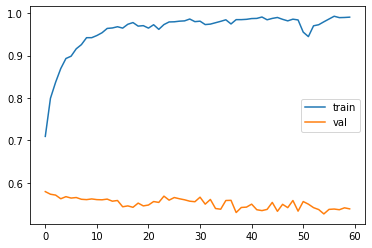

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
85/86 [============================>.] - ETA: 0s - loss: 0.9082 - acc: 0.7904
Epoch 00001: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 44ms/step - loss: 0.9056 - acc: 0.7908 - val_loss: 1.4779 - val_acc: 0.5850
Epoch 2/60
85/86 [============================>.] - ETA: 0s - loss: 0.4696 - acc: 0.8515
Epoch 00002: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 42ms/step - loss: 0.4687 - acc: 0.8516 - val_loss: 1.4719 - val_acc: 0.5929
Epoch 3/60
85/86 [============================>.] - ETA: 0s - loss: 0.3847 - acc: 0.8537
Epoch 00003: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 41ms/step - loss: 0.3834 - acc: 0.8542 - val_loss: 1.5007 - val_acc: 0.6146
Epoch 4/60
85/86 [============================>.] - ETA: 0s - loss: 0.3304 - acc: 0.8849
Epoch 00004: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 43ms/ste

Epoch 33/60
85/86 [============================>.] - ETA: 0s - loss: 0.0225 - acc: 0.9919
Epoch 00033: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 41ms/step - loss: 0.0224 - acc: 0.9919 - val_loss: 2.1218 - val_acc: 0.5629
Epoch 34/60
85/86 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9949
Epoch 00034: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 41ms/step - loss: 0.0180 - acc: 0.9949 - val_loss: 2.1893 - val_acc: 0.5637
Epoch 35/60
85/86 [============================>.] - ETA: 0s - loss: 0.0159 - acc: 0.9956
Epoch 00035: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 43ms/step - loss: 0.0159 - acc: 0.9956 - val_loss: 2.2451 - val_acc: 0.5567
Epoch 36/60
85/86 [============================>.] - ETA: 0s - loss: 0.0132 - acc: 0.9960
Epoch 00036: val_acc did not improve from 0.64133
86/86 [==============================] - 4s 44ms/step - loss: 0.0131 - acc: 0.99

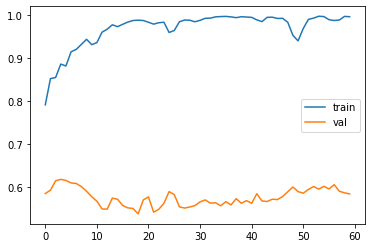

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 0.6820 - acc: 0.8044
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 4s 46ms/step - loss: 0.6820 - acc: 0.8044 - val_loss: 1.7515 - val_acc: 0.6109
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.3731 - acc: 0.8723
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.3731 - acc: 0.8723 - val_loss: 1.6713 - val_acc: 0.5887
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.3023 - acc: 0.8817
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.3023 - acc: 0.8817 - val_loss: 1.7718 - val_acc: 0.5965
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: 0.2743 - acc: 0.9000
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/ste

Epoch 33/60
77/77 [==============================] - ETA: 0s - loss: 0.0470 - acc: 0.9829
Epoch 00033: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.0470 - acc: 0.9829 - val_loss: 2.7646 - val_acc: 0.5859
Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: 0.0439 - acc: 0.9845
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.0439 - acc: 0.9845 - val_loss: 2.7450 - val_acc: 0.5957
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: 0.0401 - acc: 0.9878
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: 0.0401 - acc: 0.9878 - val_loss: 2.8215 - val_acc: 0.5978
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: 0.0505 - acc: 0.9841
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: 0.0505 - acc: 0.98

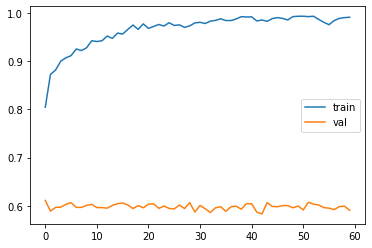

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
99/99 [==============================] - ETA: 0s - loss: 0.8560 - acc: 0.7717
Epoch 00001: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 41ms/step - loss: 0.8560 - acc: 0.7717 - val_loss: 1.5068 - val_acc: 0.5879
Epoch 2/60
99/99 [==============================] - ETA: 0s - loss: 0.5092 - acc: 0.8044
Epoch 00002: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 40ms/step - loss: 0.5092 - acc: 0.8044 - val_loss: 1.3764 - val_acc: 0.5978
Epoch 3/60
99/99 [==============================] - ETA: 0s - loss: 0.4195 - acc: 0.8302
Epoch 00003: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 41ms/step - loss: 0.4195 - acc: 0.8302 - val_loss: 1.2967 - val_acc: 0.5998
Epoch 4/60
99/99 [==============================] - ETA: 0s - loss: 0.3882 - acc: 0.8476
Epoch 00004: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 43ms/ste

Epoch 33/60
99/99 [==============================] - ETA: 0s - loss: 0.0289 - acc: 0.9902
Epoch 00033: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 40ms/step - loss: 0.0289 - acc: 0.9902 - val_loss: 2.6617 - val_acc: 0.6130
Epoch 34/60
99/99 [==============================] - ETA: 0s - loss: 0.0309 - acc: 0.9895
Epoch 00034: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 40ms/step - loss: 0.0309 - acc: 0.9895 - val_loss: 2.7344 - val_acc: 0.6171
Epoch 35/60
99/99 [==============================] - ETA: 0s - loss: 0.0719 - acc: 0.9740
Epoch 00035: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 40ms/step - loss: 0.0719 - acc: 0.9740 - val_loss: 2.5471 - val_acc: 0.6130
Epoch 36/60
99/99 [==============================] - ETA: 0s - loss: 0.0741 - acc: 0.9756
Epoch 00036: val_acc did not improve from 0.64133
99/99 [==============================] - 4s 40ms/step - loss: 0.0741 - acc: 0.97

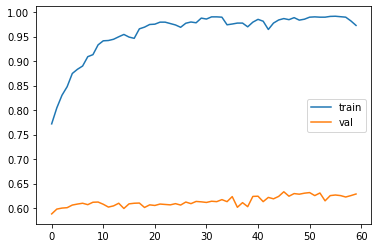

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
91/91 [==============================] - ETA: 0s - loss: 1.0212 - acc: 0.7806
Epoch 00001: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/step - loss: 1.0212 - acc: 0.7806 - val_loss: 2.2021 - val_acc: 0.6044
Epoch 2/60
91/91 [==============================] - ETA: 0s - loss: 0.5007 - acc: 0.8441
Epoch 00002: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/step - loss: 0.5007 - acc: 0.8441 - val_loss: 1.5853 - val_acc: 0.5920
Epoch 3/60
91/91 [==============================] - ETA: 0s - loss: 0.3437 - acc: 0.8758
Epoch 00003: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/step - loss: 0.3437 - acc: 0.8758 - val_loss: 1.5344 - val_acc: 0.5929
Epoch 4/60
91/91 [==============================] - ETA: 0s - loss: 0.3043 - acc: 0.8934
Epoch 00004: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/ste

Epoch 33/60
91/91 [==============================] - ETA: 0s - loss: 0.0164 - acc: 0.9959
Epoch 00033: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/step - loss: 0.0164 - acc: 0.9959 - val_loss: 2.5966 - val_acc: 0.5838
Epoch 34/60
91/91 [==============================] - ETA: 0s - loss: 0.0254 - acc: 0.9917
Epoch 00034: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/step - loss: 0.0254 - acc: 0.9917 - val_loss: 2.5193 - val_acc: 0.5859
Epoch 35/60
91/91 [==============================] - ETA: 0s - loss: 0.0172 - acc: 0.9948
Epoch 00035: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/step - loss: 0.0172 - acc: 0.9948 - val_loss: 2.5952 - val_acc: 0.5805
Epoch 36/60
91/91 [==============================] - ETA: 0s - loss: 0.0170 - acc: 0.9952
Epoch 00036: val_acc did not improve from 0.64133
91/91 [==============================] - 4s 41ms/step - loss: 0.0170 - acc: 0.99

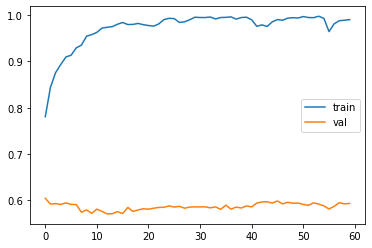

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
105/105 [==============================] - ETA: 0s - loss: 1.3296 - acc: 0.6249
Epoch 00001: val_acc did not improve from 0.64133
105/105 [==============================] - 4s 40ms/step - loss: 1.3296 - acc: 0.6249 - val_loss: 1.1557 - val_acc: 0.5863
Epoch 2/60
105/105 [==============================] - ETA: 0s - loss: 0.6660 - acc: 0.7133
Epoch 00002: val_acc did not improve from 0.64133
105/105 [==============================] - 4s 41ms/step - loss: 0.6660 - acc: 0.7133 - val_loss: 1.2170 - val_acc: 0.5941
Epoch 3/60
105/105 [==============================] - ETA: 0s - loss: 0.5279 - acc: 0.7744
Epoch 00003: val_acc did not improve from 0.64133
105/105 [==============================] - 5s 43ms/step - loss: 0.5279 - acc: 0.7744 - val_loss: 1.3376 - val_acc: 0.5933
Epoch 4/60
105/105 [==============================] - ETA: 0s - loss: 0.4390 - acc: 0.8227
Epoch 00004: val_acc did not improve from 0.64133
105/105 [=============================

Epoch 32/60
105/105 [==============================] - ETA: 0s - loss: 0.0331 - acc: 0.9875
Epoch 00032: val_acc did not improve from 0.64133
105/105 [==============================] - 4s 40ms/step - loss: 0.0331 - acc: 0.9875 - val_loss: 2.6024 - val_acc: 0.5308
Epoch 33/60
105/105 [==============================] - ETA: 0s - loss: 0.0412 - acc: 0.9863
Epoch 00033: val_acc did not improve from 0.64133
105/105 [==============================] - 4s 40ms/step - loss: 0.0412 - acc: 0.9863 - val_loss: 2.7809 - val_acc: 0.5119
Epoch 34/60
105/105 [==============================] - ETA: 0s - loss: 0.0450 - acc: 0.9854
Epoch 00034: val_acc did not improve from 0.64133
105/105 [==============================] - 4s 41ms/step - loss: 0.0450 - acc: 0.9854 - val_loss: 2.5595 - val_acc: 0.5242
Epoch 35/60
105/105 [==============================] - ETA: 0s - loss: 0.0735 - acc: 0.9723
Epoch 00035: val_acc did not improve from 0.64133
105/105 [==============================] - 4s 40ms/step - loss: 0.

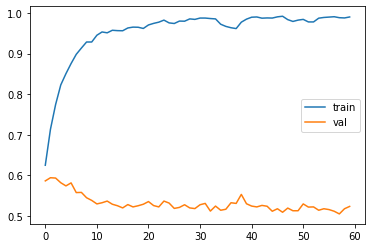

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
83/83 [==============================] - ETA: 0s - loss: 0.9661 - acc: 0.8040
Epoch 00001: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 42ms/step - loss: 0.9661 - acc: 0.8040 - val_loss: 1.5455 - val_acc: 0.6142
Epoch 2/60
83/83 [==============================] - ETA: 0s - loss: 0.4753 - acc: 0.8351
Epoch 00002: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 42ms/step - loss: 0.4753 - acc: 0.8351 - val_loss: 1.3696 - val_acc: 0.6220
Epoch 3/60
83/83 [==============================] - ETA: 0s - loss: 0.3807 - acc: 0.8730
Epoch 00003: val_acc did not improve from 0.64133
83/83 [==============================] - 4s 43ms/step - loss: 0.3807 - acc: 0.8730 - val_loss: 1.2830 - val_acc: 0.6253
Epoch 4/60
83/83 [==============================] - ETA: 0s - loss: 0.3344 - acc: 0.8795
Epoch 00004: val_acc did not improve from 0.64133
83/83 [==============================] - 4s 42ms/ste

Epoch 33/60
83/83 [==============================] - ETA: 0s - loss: 0.1049 - acc: 0.9636
Epoch 00033: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 42ms/step - loss: 0.1049 - acc: 0.9636 - val_loss: 2.2792 - val_acc: 0.5978
Epoch 34/60
83/83 [==============================] - ETA: 0s - loss: 0.0902 - acc: 0.9659
Epoch 00034: val_acc did not improve from 0.64133
83/83 [==============================] - 4s 45ms/step - loss: 0.0902 - acc: 0.9659 - val_loss: 2.1851 - val_acc: 0.5776
Epoch 35/60
83/83 [==============================] - ETA: 0s - loss: 0.0867 - acc: 0.9670
Epoch 00035: val_acc did not improve from 0.64133
83/83 [==============================] - 4s 42ms/step - loss: 0.0867 - acc: 0.9670 - val_loss: 2.2978 - val_acc: 0.5818
Epoch 36/60
83/83 [==============================] - ETA: 0s - loss: 0.0593 - acc: 0.9810
Epoch 00036: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 41ms/step - loss: 0.0593 - acc: 0.98

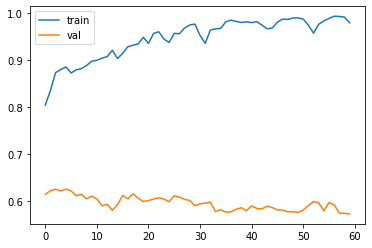

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
83/83 [==============================] - ETA: 0s - loss: 1.1219 - acc: 0.6841
Epoch 00001: val_acc did not improve from 0.64133
83/83 [==============================] - 4s 45ms/step - loss: 1.1219 - acc: 0.6841 - val_loss: 1.4191 - val_acc: 0.5776
Epoch 2/60
83/83 [==============================] - ETA: 0s - loss: 0.6936 - acc: 0.7431
Epoch 00002: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 42ms/step - loss: 0.6936 - acc: 0.7431 - val_loss: 1.2171 - val_acc: 0.5842
Epoch 3/60
83/83 [==============================] - ETA: 0s - loss: 0.5731 - acc: 0.7644
Epoch 00003: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 41ms/step - loss: 0.5731 - acc: 0.7644 - val_loss: 1.1935 - val_acc: 0.5846
Epoch 4/60
83/83 [==============================] - ETA: 0s - loss: 0.4894 - acc: 0.8074
Epoch 00004: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 42ms/ste

Epoch 33/60
83/83 [==============================] - ETA: 0s - loss: 0.0629 - acc: 0.9737
Epoch 00033: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 41ms/step - loss: 0.0629 - acc: 0.9737 - val_loss: 2.2865 - val_acc: 0.5867
Epoch 34/60
83/83 [==============================] - ETA: 0s - loss: 0.0474 - acc: 0.9844
Epoch 00034: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 41ms/step - loss: 0.0474 - acc: 0.9844 - val_loss: 2.3119 - val_acc: 0.5781
Epoch 35/60
83/83 [==============================] - ETA: 0s - loss: 0.0391 - acc: 0.9852
Epoch 00035: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 41ms/step - loss: 0.0391 - acc: 0.9852 - val_loss: 2.4255 - val_acc: 0.5637
Epoch 36/60
83/83 [==============================] - ETA: 0s - loss: 0.0367 - acc: 0.9882
Epoch 00036: val_acc did not improve from 0.64133
83/83 [==============================] - 3s 42ms/step - loss: 0.0367 - acc: 0.98

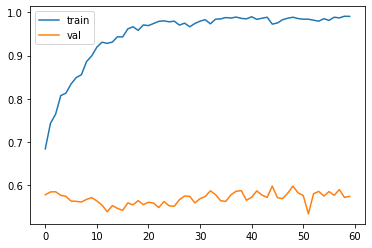

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00001: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 44ms/step - loss: nan - acc: 0.0767 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00002: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0767 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00003: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 44ms/step - loss: nan - acc: 0.0767 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00004: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 44ms/step - loss: nan - acc: 0.0767 - 

Epoch 34/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00034: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0767 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00035: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0767 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00036: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0767 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
71/71 [==============================] - ETA: 0s - loss: nan - acc: 0.0767
Epoch 00037: val_acc did not improve from 0.64133
71/71 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0767 - val_loss: nan - val_acc: 0.1

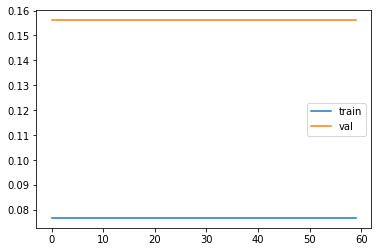

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00001: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1647 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00002: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1647 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00003: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1647 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00004: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1647 - 

Epoch 34/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00034: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1647 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00035: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1647 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00036: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1647 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
89/89 [==============================] - ETA: 0s - loss: nan - acc: 0.1647
Epoch 00037: val_acc did not improve from 0.64133
89/89 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1647 - val_loss: nan - val_acc: 0.1

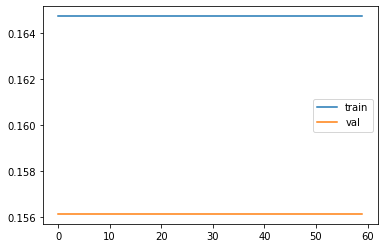

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00001: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00002: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00003: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00004: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - 

Epoch 34/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00034: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00035: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00036: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
93/94 [============================>.] - ETA: 0s - loss: nan - acc: 0.0712
Epoch 00037: val_acc did not improve from 0.64133
94/94 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0706 - val_loss: nan - val_acc: 0.1

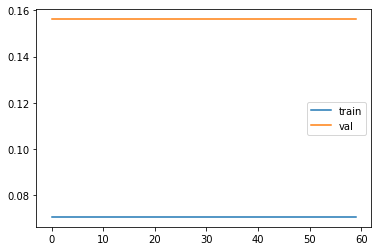

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00001: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00002: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00003: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00004: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1363 - 

Epoch 34/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00034: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00035: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00036: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00037: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.1

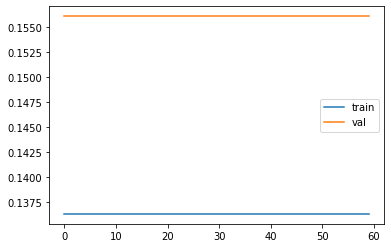

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00001: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1633 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00002: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1633 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00003: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1633 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00004: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1633 - 

Epoch 34/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00034: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1633 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00035: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1633 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00036: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1633 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1637
Epoch 00037: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1633 - val_loss: nan - val_acc: 0.1

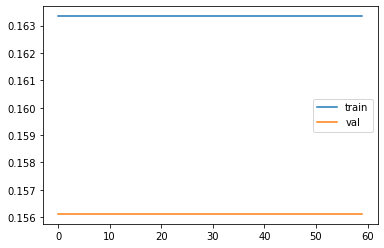

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00001: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00002: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00003: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00004: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - 

Epoch 34/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00034: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00035: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00036: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1123
Epoch 00037: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1115 - val_loss: nan - val_acc: 0.1

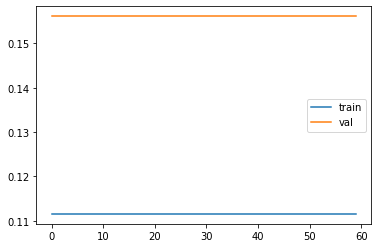

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1826 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1826 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1826 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1826 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1826 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1826 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1826 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1826
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1826 - val_loss: nan - val_acc: 0.1

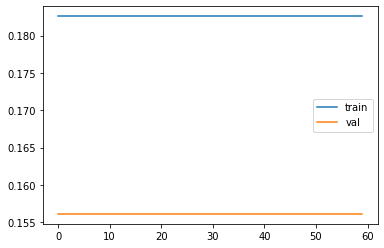

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00001: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0893 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00002: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0893 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00003: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0893 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00004: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0893 - 

Epoch 34/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00034: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0893 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00035: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0893 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00036: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 41ms/step - loss: nan - acc: 0.0893 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
89/90 [============================>.] - ETA: 0s - loss: nan - acc: 0.0895
Epoch 00037: val_acc did not improve from 0.64133
90/90 [==============================] - 4s 42ms/step - loss: nan - acc: 0.0893 - val_loss: nan - val_acc: 0.1

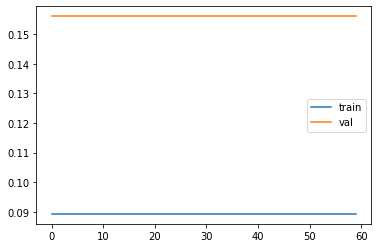

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00001: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 47ms/step - loss: nan - acc: 0.1536 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00002: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 47ms/step - loss: nan - acc: 0.1536 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00003: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1536 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00004: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1536 - 

Epoch 34/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00034: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 47ms/step - loss: nan - acc: 0.1536 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00035: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1536 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00036: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1536 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
55/55 [==============================] - ETA: 0s - loss: nan - acc: 0.1536
Epoch 00037: val_acc did not improve from 0.64133
55/55 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1536 - val_loss: nan - val_acc: 0.1

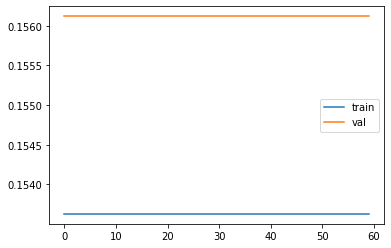

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
97/97 [==============================] - ETA: 0s - loss: nan - acc: 0.1165
Epoch 00001: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1165 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
97/97 [==============================] - ETA: 0s - loss: nan - acc: 0.1165
Epoch 00002: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1165 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
97/97 [==============================] - ETA: 0s - loss: nan - acc: 0.1165
Epoch 00003: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1165 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
97/97 [==============================] - ETA: 0s - loss: nan - acc: 0.1165
Epoch 00004: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1165 - 

Epoch 34/60
97/97 [==============================] - ETA: 0s - loss: nan - acc: 0.1165
Epoch 00034: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1165 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
97/97 [==============================] - ETA: 0s - loss: nan - acc: 0.1165
Epoch 00035: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1165 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
96/97 [============================>.] - ETA: 0s - loss: nan - acc: 0.1172
Epoch 00036: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1165 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
97/97 [==============================] - ETA: 0s - loss: nan - acc: 0.1165
Epoch 00037: val_acc did not improve from 0.64133
97/97 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1165 - val_loss: nan - val_acc: 0.1

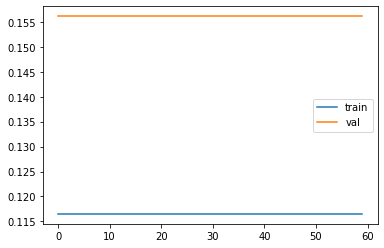

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1358 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1358 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1358 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1358 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1358 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1358 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1358 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1358
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1358 - val_loss: nan - val_acc: 0.1

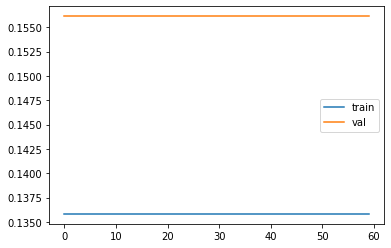

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.2107 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2107 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.2107 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2107 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2107 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2107 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2107 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2107
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.2107 - val_loss: nan - val_acc: 0.1

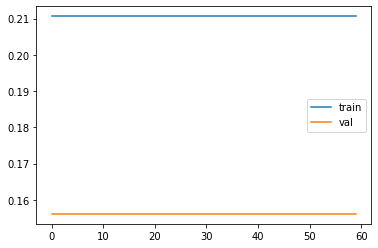

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1627 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1627
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627 - val_loss: nan - val_acc: 0.1

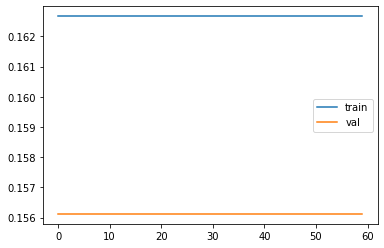

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00001: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1367 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00002: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1367 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00003: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1367 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00004: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1367 - 

Epoch 34/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00034: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1367 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00035: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1367 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00036: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 40ms/step - loss: nan - acc: 0.1367 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
93/93 [==============================] - ETA: 0s - loss: nan - acc: 0.1367
Epoch 00037: val_acc did not improve from 0.64133
93/93 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1367 - val_loss: nan - val_acc: 0.1

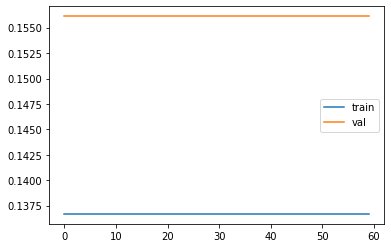

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00001: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1502 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00002: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1502 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00003: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1502 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00004: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1502 - 

Epoch 34/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00034: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1502 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00035: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1502 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00036: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1502 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
57/58 [============================>.] - ETA: 0s - loss: nan - acc: 0.1513
Epoch 00037: val_acc did not improve from 0.64133
58/58 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1502 - val_loss: nan - val_acc: 0.1

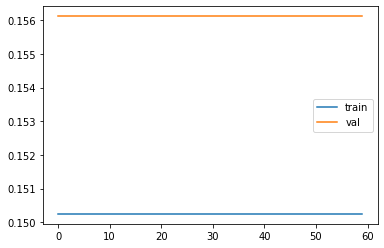

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00001: val_acc did not improve from 0.64133
85/85 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1081 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00002: val_acc did not improve from 0.64133
85/85 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1081 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00003: val_acc did not improve from 0.64133
85/85 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1081 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00004: val_acc did not improve from 0.64133
85/85 [==============================] - 4s 44ms/step - loss: nan - acc: 0.1081 - 

Epoch 34/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00034: val_acc did not improve from 0.64133
85/85 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1081 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00035: val_acc did not improve from 0.64133
85/85 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1081 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00036: val_acc did not improve from 0.64133
85/85 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1081 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
85/85 [==============================] - ETA: 0s - loss: nan - acc: 0.1081
Epoch 00037: val_acc did not improve from 0.64133
85/85 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1081 - val_loss: nan - val_acc: 0.1

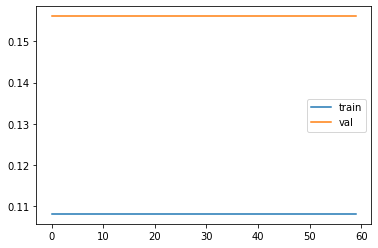

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1631 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1631
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 - val_loss: nan - val_acc: 0.1

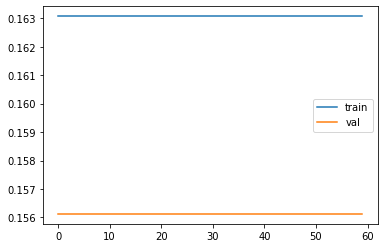

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.2229 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 44ms/step - loss: nan - acc: 0.2229 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.2229
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229 - val_loss: nan - val_acc: 0.1

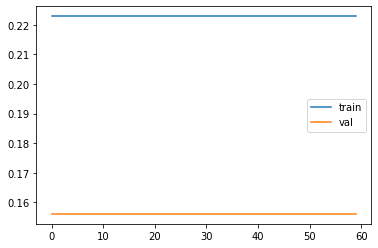

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1553 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1553 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1553 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1553 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1553 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1553 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1553 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1553
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1553 - val_loss: nan - val_acc: 0.1

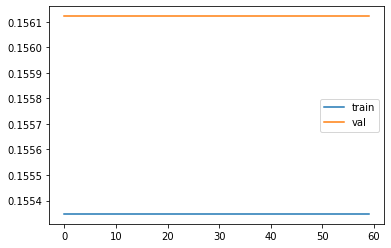

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00001: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1420 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00002: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1420 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00003: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1420 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00004: val_acc did not improve from 0.64133
81/81 [==============================] - 4s 44ms/step - loss: nan - acc: 0.1420 - 

Epoch 34/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00034: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1420 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00035: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1420 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00036: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1420 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
81/81 [==============================] - ETA: 0s - loss: nan - acc: 0.1420
Epoch 00037: val_acc did not improve from 0.64133
81/81 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1420 - val_loss: nan - val_acc: 0.1

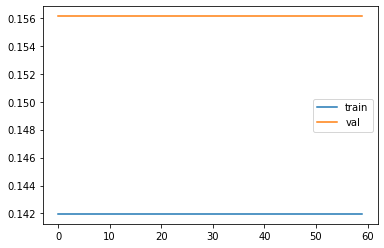

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00001: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 47ms/step - loss: nan - acc: 0.1665 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00002: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1665 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00003: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1665 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00004: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1665 - 

Epoch 34/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00034: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 48ms/step - loss: nan - acc: 0.1665 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00035: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1665 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00036: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1665 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
55/56 [============================>.] - ETA: 0s - loss: nan - acc: 0.1608
Epoch 00037: val_acc did not improve from 0.64133
56/56 [==============================] - 3s 47ms/step - loss: nan - acc: 0.1665 - val_loss: nan - val_acc: 0.1

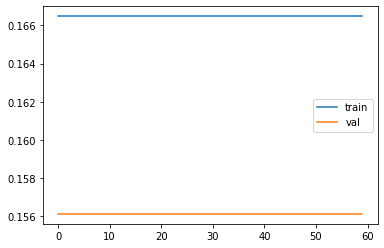

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1208
Epoch 00001: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1208
Epoch 00002: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1208
Epoch 00003: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1208
Epoch 00004: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1205 - 

Epoch 34/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1208
Epoch 00034: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1208
Epoch 00035: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
75/76 [============================>.] - ETA: 0s - loss: nan - acc: 0.1208
Epoch 00036: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
76/76 [==============================] - ETA: 0s - loss: nan - acc: 0.1205
Epoch 00037: val_acc did not improve from 0.64133
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205 - val_loss: nan - val_acc: 0.1

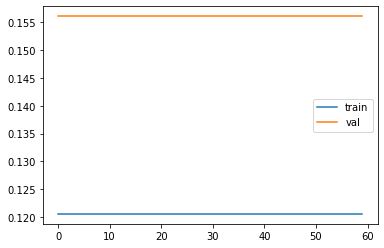

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00001: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00002: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00003: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00004: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 - 

Epoch 34/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00034: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00035: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00036: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
79/80 [============================>.] - ETA: 0s - loss: nan - acc: 0.1416
Epoch 00037: val_acc did not improve from 0.64133
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 - val_loss: nan - val_acc: 0.1

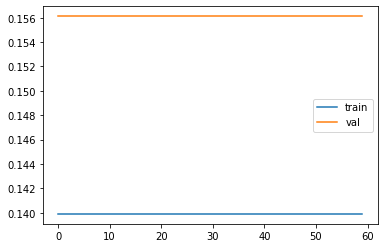

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00001: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00002: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00003: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00004: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675 - 

Epoch 34/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00034: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00035: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00036: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
95/96 [============================>.] - ETA: 0s - loss: nan - acc: 0.1671
Epoch 00037: val_acc did not improve from 0.64133
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1

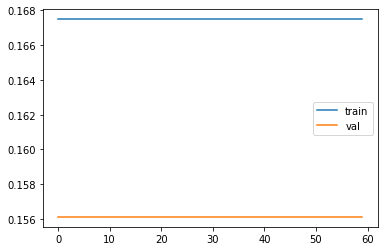

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00001: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00002: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00003: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00004: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 - 

Epoch 34/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00034: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00035: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00036: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
77/77 [==============================] - ETA: 0s - loss: nan - acc: 0.1037
Epoch 00037: val_acc did not improve from 0.64133
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1037 - val_loss: nan - val_acc: 0.1

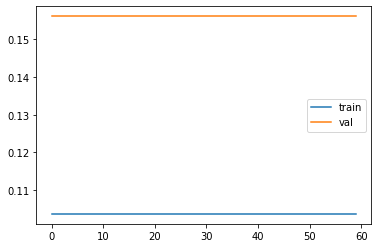

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00001: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00002: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00003: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00004: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - 

Epoch 34/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00034: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - val_loss: nan - val_acc: 0.1561
Epoch 35/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00035: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - val_loss: nan - val_acc: 0.1561
Epoch 36/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00036: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - val_loss: nan - val_acc: 0.1561
Epoch 37/60
75/75 [==============================] - ETA: 0s - loss: nan - acc: 0.0358
Epoch 00037: val_acc did not improve from 0.64133
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358 - val_loss: nan - val_acc: 0.1

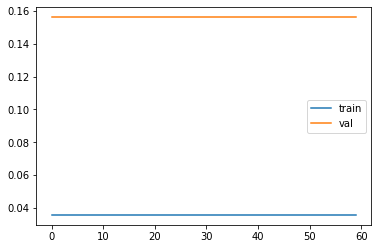

['Dataset\\ALB(2003,2015).csv']
Epoch 1/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1258
Epoch 00001: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1250 - val_loss: nan - val_acc: 0.1561
Epoch 2/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1258
Epoch 00002: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1250 - val_loss: nan - val_acc: 0.1561
Epoch 3/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1258
Epoch 00003: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1250 - val_loss: nan - val_acc: 0.1561
Epoch 4/60
81/82 [============================>.] - ETA: 0s - loss: nan - acc: 0.1258
Epoch 00004: val_acc did not improve from 0.64133
82/82 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1250 - 

In [ ]:
er = []
for train_name in range(0,70):
    try:
        df = pd.read_csv(datalist[train_name])
        df = signal_to_catagorical(df)
        df = df[30:]
        x_train = df[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
        x_train = add_shift_day(x_train,30)
        y_train = df['Signal']
        y_train = to_categorical(y_train)
        y_train = y_train.tolist()
        del y_train[0:30]
        y_train = np.array(y_train)

        r = random.randint(0,2)
        val = val_list[1]
        val = signal_to_catagorical(val)
        x_val = val[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
        x_val = add_shift_day(x_val,30)
        y_val = val['Signal']
        y_val = to_categorical(y_val)
        y_val = y_val.tolist()
        del y_val[0:30]
        y_val = np.array(y_val)

        h = model.fit(x_train, y_train, epochs=60,validation_data=(x_val,y_val),callbacks=[checkpoint],shuffle=False)
        model.save('Model list/lstm3/model_lstm3_1_'+str(train_name)+'.h5')
        plt.plot(h.history['acc'])
        plt.plot(h.history['val_acc'])
        plt.legend(['train', 'val'])
        plt.show()
    except:
            er.append(datalist[train_name])
    print(er)


In [40]:
model = load_model('Model list/lstm3/model_lstm3_1_25.h5')

In [41]:
for test in test_list:
    # print(test)
    test = signal_to_catagorical(test)
    #   print(test)
    x_test = test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
    x_test = add_shift_day(x_test,30)
    y_test = test['Signal'].values
    y_test = y_test.tolist()
    del y_test[0:30]
    y_test = np.array(y_test)

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis = -1)
    y_test = y_test.astype('int64')
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(cm)

    
  

Confusion Matrix
[[ 148    1  360]
 [  20   26  264]
 [ 290   98 1400]]
Confusion Matrix
[[  73   45  363]
 [  22   74  319]
 [  93  167 1496]]


C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Text(0.5, 0, 'Date')

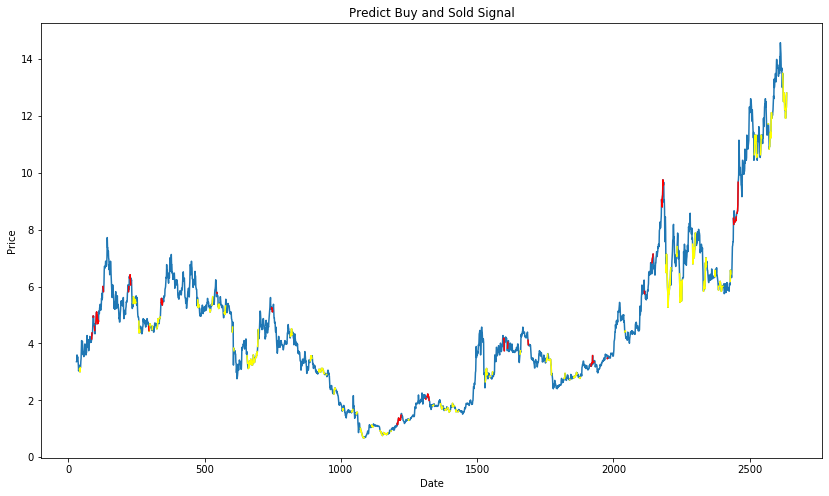

In [42]:
p_test = test_list[0]
p_test = signal_to_catagorical(p_test)
x_test = p_test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
x_test = add_shift_day(x_test,30)
y_test = p_test['Signal'].values
y_test = y_test.tolist()
del y_test[0:30]
y_test = np.array(y_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = -1)
p_test = p_test.iloc[30:]

p_test['pred'] = y_pred
p_test['pred_b'] = np.where(p_test['pred'] == 0,p_test['Close'],np.nan)
p_test['pred_s'] = np.where(p_test['pred'] == 1,p_test['Close'],np.nan)

plt.figure(figsize=(14,8))
# plt.grid()
plt.title('Predict Buy and Sold Signal')
plt.plot(p_test['Close'])
plt.plot(p_test['pred_b'],color='yellow')
plt.plot(p_test['pred_s'],color='red')
plt.ylabel('Price')
plt.xlabel('Date')

In [22]:
'Model list/lstm3/model_lstm3_1_20.h5'

'Model list/lstm3/model_lstm3_1_20.h5'